### Demonstration of traditional (non-w-projection) gridding

##### Requires:
- ipython
- numpy
- matplotlib
- make_image_standard (crocodle module)

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from make_image_standard import GriddingConvolutionFunction, Grid, Image, grid_data
import time
import random

#### Generate some visibility data

Time taken = 0.000 s


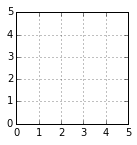

In [20]:
t0 = time.time()
num_vis = 1
uvw = np.zeros((num_vis, 3), dtype='f8')
vis = np.zeros((num_vis,), dtype='c16')
vis[0] = 1.0 + 0.0j
uvw[0, 0] = 0.0 # + random.random()
uvw[0, 1] = 0.0 # + random.random()
print 'Time taken = %.3f s' % (time.time() - t0)
fig = plt.figure(figsize=(2, 2))
fig.add_subplot(111, aspect='equal')
plt.plot(uvw[:, 0], uvw[:, 1], '+')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.grid()
# TODO load a simulated data set instead.

#### Generate a gridding convolution function

In [21]:
t0 = time.time()
support = 3  # Number of grid pixels = support * 2 + 1
over_sample = 63  # Number of points points per grid cell.
gcf = GriddingConvolutionFunction(support, over_sample)
# gcf.pillbox_2d()
# gcf.exponential_2d()
# gcf.sinc_2d()
gcf.exponential_sinc_2d()
print 'Time taken = %.3f s' % (time.time() - t0)
# gcf.plot()

Time taken = 0.028 s


#### Gridding

In [22]:
t0 = time.time()
im_size = 128
cell_size_uv_m = 1.0
grid = Grid(im_size, cell_size_uv_m)
grid_data(uvw, vis, gcf, grid)
print 'Time taken = %.3f s' % (time.time() - t0)
extent = [64-10, 64+10, 64-10, 64+10]
# grid.plot(extent)
# grid.plot()

Time taken = 0.001 s


#### Grid -> image


In [23]:
t0 = time.time()
image = Image(grid)
print 'Time taken = %.3f s [image fft]' % (time.time() - t0)
# image.plot()
t0 = time.time()
image.grid_correct(gcf)
print 'Time taken = %.3f s [grid correction]' % (time.time() - t0)
# FIXME Correction is not working fully
# - FFT padding to generate the correction pad gcf to size of image?
# - change rounding method in gridding?
# image.plot_correction()
#image.plot()
plt.imshow(image.data, interpolation='nearest')

Time taken = 0.003 s [image fft]
xxx 121 60
[0 1 2 3 4 5 6]
31
-- (7,)
7 63 (441, 441)
Time taken = 0.006 s [grid correction]
